### Análise Univariadas

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
csv_files = [
        'data/f1db-races-race-results.csv',
        'data/f1db-circuits.csv',
        'data/f1db-constructors-chronology.csv',
        'data/f1db-constructors.csv',
        'data/f1db-drivers.csv',
        'data/f1db-engine-manufacturers.csv',
        'data/f1db-races-constructor-standings.csv',
        'data/f1db-races-driver-standings.csv',
        'data/f1db-races-fastest-laps.csv',
        'data/f1db-races-pit-stops.csv',
        'data/f1db-races-qualifying-results.csv',
        'data/f1db-races-starting-grid-positions.csv',
        'data/f1db-races.csv',
        'data/f1db-seasons-constructors.csv',
        'data/f1db-seasons-drivers.csv',
        'data/f1db-seasons-engine-manufacturers.csv',
        'data/f1db-seasons-entrants-tyre-manufacturers.csv'
        ]

# Read

In [4]:
import pandas as pd

In [5]:
df_races = pd.read_csv('data/f1db-races.csv')
df_races_race_results = pd.read_csv('data/f1db-races-race-results.csv')
df_races_driver_standings = pd.read_csv('data/f1db-races-driver-standings.csv')
df_races_fastest_laps = pd.read_csv('data/f1db-races-fastest-laps.csv')
df_races_constructor_standings = pd.read_csv('data/f1db-races-constructor-standings.csv')
df_races_qualifying_results = pd.read_csv('data/f1db-races-qualifying-results.csv')
df_races_starting_grid_positions = pd.read_csv('data/f1db-races-starting-grid-positions.csv')
df_circuits = pd.read_csv('data/f1db-circuits.csv')
df_constructors_chronology = pd.read_csv('data/f1db-constructors-chronology.csv')
df_constructors = pd.read_csv('data/f1db-constructors.csv')
df_drivers = pd.read_csv('data/f1db-drivers.csv')
df_engine_manufacturers = pd.read_csv('data/f1db-engine-manufacturers.csv')
df_seasons_constructors = pd.read_csv('data/f1db-seasons-constructors.csv')
df_seasons_drivers = pd.read_csv('data/f1db-seasons-drivers.csv')
df_seasons_engine_manufacturers = pd.read_csv('data/f1db-seasons-engine-manufacturers.csv')
df_seasons_entrants_tyre_manufacturers = pd.read_csv('data/f1db-seasons-entrants-tyre-manufacturers.csv')

C:\Users\vtmac\AppData\Local\Temp\ipykernel_29980\2744422170.py:2: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_races_race_results = pd.read_csv('data/f1db-races-race-results.csv')


In [6]:
df_races.rename(columns={'id': 'raceId'}, inplace=True)
df_circuits.rename(columns={'id': 'circuitId'}, inplace=True)
df_constructors.rename(columns={'id': 'constructorId'}, inplace=True)
df_drivers.rename(columns={'id': 'driverId'}, inplace=True)
df_engine_manufacturers.rename(columns={'id': 'engineManufacturerId'}, inplace=True)

In [7]:
def prefixar_sem_id(df, prefixo):
    return df.rename(columns={
        col: f"{prefixo}{col}" if "Id" not in col else col
        for col in df.columns
    })

In [8]:
from itertools import combinations

def encontrar_chave(df, colunas=None, max_comb=10, verbose=False):
    if colunas is None:
        # pega apenas colunas que parecem ser IDs
        colunas = [col for col in df.columns if ((col=='id') or ('Id' in col))]
        print(colunas)
    
    for r in range(1, min(len(colunas), max_comb) + 1):
        for comb in combinations(colunas, r):
            n_unique = df[list(comb)].drop_duplicates().shape[0]
            if verbose:
                print(f"Testando: {comb} → {n_unique} únicos")
            if n_unique == len(df):
                return comb  # encontrou chave única

    return None  # nenhuma combinação encontrada

In [9]:
encontrar_chave(df_seasons_entrants_tyre_manufacturers, verbose=False)

['entrantId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']


In [10]:
# 1149 registros - df_races
# 26911 registros - df_races_race_results
# 26912 registros - df_races_qualifying_results

df_merge = df_races \
    .merge(prefixar_sem_id(df_races_race_results, 'races_race_results_'), how='left', on='raceId') \
    .merge(prefixar_sem_id(df_races_constructor_standings, 'races_constructor_standings_'), how='left', on=['raceId', 'constructorId', 'engineManufacturerId']) \
    .merge(prefixar_sem_id(df_races_driver_standings, 'races_driver_standings_'), how='left', on=['raceId', 'driverId']) \
    .merge(prefixar_sem_id(df_races_starting_grid_positions, 'races_starting_grid_positions_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    .merge(prefixar_sem_id(df_circuits, 'circuits_'), how='left', on=['circuitId']) \
    .merge(prefixar_sem_id(df_constructors, 'constructors_'), how='left', on=['constructorId']) \
    .merge(prefixar_sem_id(df_drivers, 'drivers_'), how='left', on=['driverId']) \
    .merge(prefixar_sem_id(df_engine_manufacturers, 'engine_manufacturers_'), how='left', on=['engineManufacturerId']) \
    .merge(prefixar_sem_id(df_seasons_constructors, 'seasons_constructors_'), how='left', left_on=['constructorId', 'year'], right_on=['constructorId', 'seasons_constructors_year']) \
    .merge(prefixar_sem_id(df_seasons_drivers, 'seasons_drivers_'), how='left', left_on=['driverId', 'year'], right_on=['driverId', 'seasons_drivers_year']) \
    .merge(prefixar_sem_id(df_seasons_engine_manufacturers, 'seasons_engine_manufacturers_'), how='left', left_on=['engineManufacturerId', 'year'], right_on=['engineManufacturerId', 'seasons_engine_manufacturers_year']) \
    .merge(prefixar_sem_id(df_races_qualifying_results, 'races_qualifying_results_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_races_fastest_laps, 'races_fastest_laps_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_constructors_chronology, 'constructors_chronology_'), how='left', on=['constructorId']) \
    # .merge(prefixar_sem_id(df_seasons_entrants_tyre_manufacturers, 'seasons_entrants_tyre_manufacturers_'), how='left', left_on=['year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'], right_on=['seasons_entrants_tyre_manufacturers_year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_races_pit_stops, 'races_pit_stops_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'])
df_merge.shape[0]

26931

In [11]:
df_races_qualifying_results[df_races_qualifying_results.duplicated(subset=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'], keep=False)]

,raceId,year,round,positionDisplayOrder,positionNumber,positionText,driverNumber,driverId,constructorId,engineManufacturerId,tyreManufacturerId,time,timeMillis,q1,q1Millis,q2,q2Millis,q3,q3Millis,gap,gapMillis,interval,intervalMillis,laps
25511,1089,2023,10,15,NaN,NC,77,valtteri-bottas,alfa-romeo,ferrari,pirelli,NaN,NaN,1:29.798,89798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
25517,1089,2023,10,21,NaN,DSQ,77,valtteri-bottas,alfa-romeo,ferrari,pirelli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_merge['circuitType'].unique()

array(['RACE', 'STREET', 'ROAD'], dtype=object)

In [13]:
df_pole_ganhou = df_merge[(df_merge['races_race_results_positionNumber'] == 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)]
df_pole_nao_ganhou = df_merge[(df_merge['races_race_results_positionNumber'] != 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)]

In [14]:
list_raceid = list(df_merge['raceId'].astype(str).unique())
list_raceid_pole_ganhou = list(df_pole_ganhou['raceId'].astype(str).unique())
list_raceid_pole_nao_ganhou = list(df_pole_nao_ganhou['raceId'].astype(str).unique())

In [15]:
lista_pole = list(set(list_raceid_pole_ganhou + list_raceid_pole_nao_ganhou))

In [16]:
list_raceid_not_in_pole = [id for id in list_raceid if id not in lista_pole]

In [17]:
list_raceid_not_in_pole

['1131',
 '1132',
 '1133',
 '1134',
 '1135',
 '1136',
 '1137',
 '1138',
 '1139',
 '1140',
 '1141',
 '1142',
 '1143',
 '1144',
 '1145',
 '1146',
 '1147',
 '1148',
 '1149']

In [18]:
# São corridas que não aconteceram ainda. Necessário eliminar!
df_merge[df_merge['raceId'].astype(str).isin(list_raceid_not_in_pole)][['raceId', 'races_race_results_positionNumber', 'races_race_results_qualificationPositionNumber']]

,raceId,races_race_results_positionNumber,races_race_results_qualificationPositionNumber
26912,1131,NaN,NaN
26913,1132,NaN,NaN
26914,1133,NaN,NaN
26915,1134,NaN,NaN
26916,1135,NaN,NaN
26917,1136,NaN,NaN
26918,1137,NaN,NaN
26919,1138,NaN,NaN
26920,1139,NaN,NaN
26921,1140,NaN,NaN


In [19]:
df_merge.iloc[26891:26893, :][['raceId', 'driverId']]

,raceId,driverId
26891,1129,nico-hulkenberg
26892,1130,oscar-piastri


In [20]:
df_races_finished = df_merge[(df_merge['races_race_results_positionNumber'].notna()) & (df_merge['races_race_results_qualificationPositionNumber'].notna()) & (df_merge['driverId'].notna())]

In [21]:
# Fazer função para trazer verdadeiro pole_ganhou, falso pole_nao_ganhou, senão, nulo
df_races_finished['pole_ganhou'] = (df_races_finished['races_race_results_positionNumber'] == 1) & (df_races_finished['races_race_results_qualificationPositionNumber'] == 1)
# df_merge['pole_nao_ganhou'] = (df_merge['races_race_results_positionNumber'] != 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)

C:\Users\vtmac\AppData\Local\Temp\ipykernel_29980\1147191514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_races_finished['pole_ganhou'] = (df_races_finished['races_race_results_positionNumber'] == 1) & (df_races_finished['races_race_results_qualificationPositionNumber'] == 1)


In [22]:
df_pole_ganhou_por_corrida = df_races_finished[['raceId', 'year', 'pole_ganhou']].sort_values(by='pole_ganhou', ascending=False).drop_duplicates(subset='raceId', keep='first').sort_values('raceId')
df_pole_ganhou_por_corrida.shape

(1130, 3)

In [23]:
df_pole_ganhou_por_corrida[df_pole_ganhou_por_corrida['pole_ganhou'] == True].count()

raceId         483
year           483
pole_ganhou    483
dtype: int64

In [24]:
df_pole_ganhou_por_corrida[df_pole_ganhou_por_corrida['pole_ganhou'] == False].count()

raceId         647
year           647
pole_ganhou    647
dtype: int64

In [25]:
df_pole_ganhou_por_corrida['year_init'] = (df_pole_ganhou_por_corrida['year'] // 5) * 5
df_pole_ganhou_por_corrida['year_end'] = (df_pole_ganhou_por_corrida['year'] // 5) * 5 + 4
df_pole_ganhou_por_corrida['five_years_interval'] = df_pole_ganhou_por_corrida['year_init'].astype(str) + ' - ' + df_pole_ganhou_por_corrida['year_end'].astype(str)

In [26]:
df_pole_ganhou_por_corrida.head()

,raceId,year,pole_ganhou,year_init,year_end,five_years_interval
0,1,1950,True,1950,1954,1950 - 1954
23,2,1950,True,1950,1954,1950 - 1954
60,3,1950,False,1950,1954,1950 - 1954
90,4,1950,False,1950,1954,1950 - 1954
98,5,1950,False,1950,1954,1950 - 1954


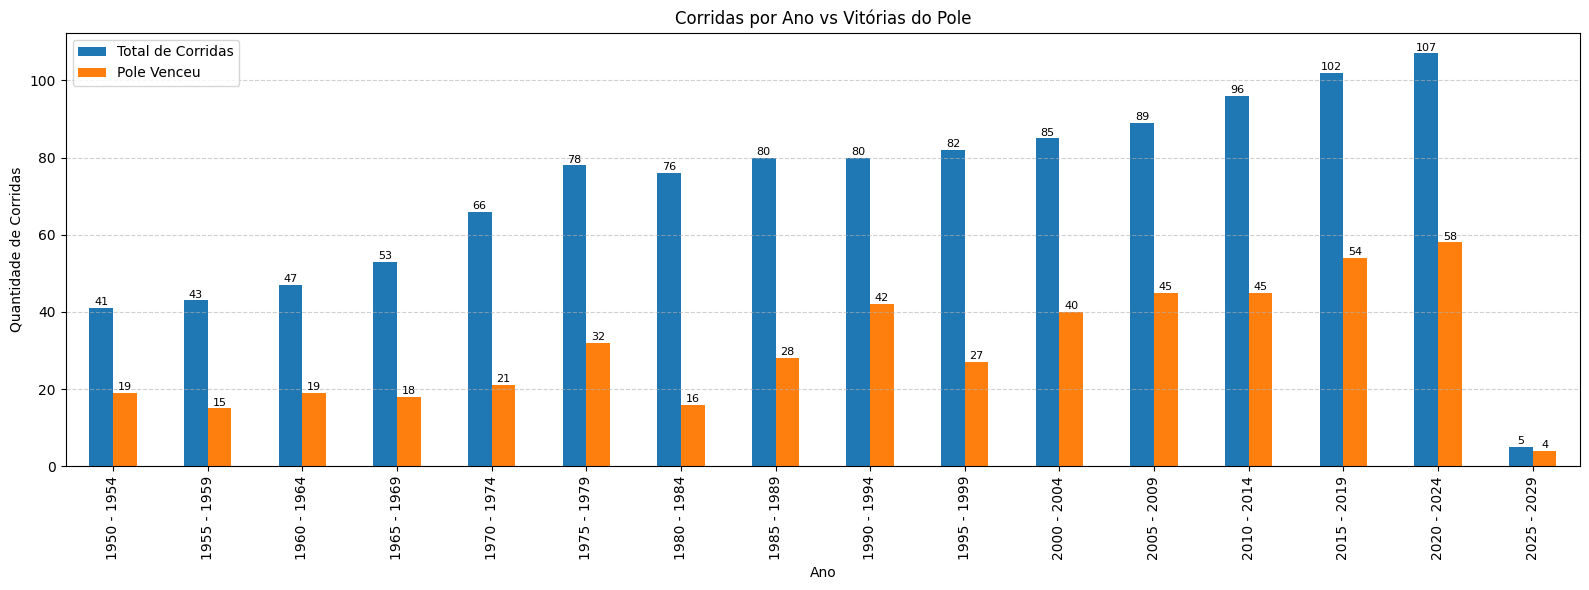

In [27]:
import matplotlib.pyplot as plt

# Total de corridas por ano
total_por_ano = df_pole_ganhou_por_corrida.groupby('five_years_interval').size()

# Corridas em que o pole venceu por ano
pole_ganhou_por_ano = df_pole_ganhou_por_corrida[df_pole_ganhou_por_corrida['pole_ganhou']].groupby('five_years_interval').size()

# Garantir que ambas as séries tenham os mesmos índices (anos)
result = pd.DataFrame({
    'total_corridas': total_por_ano,
    'pole_venceu': pole_ganhou_por_ano
}).fillna(0)

# Converter pole_venceu para inteiro
result['pole_venceu'] = result['pole_venceu'].astype(int)

# Plotando
ax = result.plot(kind='bar', figsize=(16, 6))
plt.title('Corridas por Ano vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Ano')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 0.2,                 # ajusta posição vertical
                int(altura),                 # valor a ser exibido
                ha='center', va='bottom', fontsize=8)

plt.show()

In [28]:
df_pole_ganhou_por_circuito = df_races_finished[['raceId', 'year', 'pole_ganhou', 'circuitId']].sort_values(by='pole_ganhou', ascending=False).drop_duplicates(subset='raceId', keep='first').sort_values('raceId')
df_pole_ganhou_por_circuito.shape

(1130, 4)

In [29]:
df_pole_ganhou_por_circuito.head()

,raceId,year,pole_ganhou,circuitId
0,1,1950,True,silverstone
23,2,1950,True,monaco
60,3,1950,False,indianapolis
90,4,1950,False,bremgarten
98,5,1950,False,spa-francorchamps


In [30]:
result['percentual_pole_venceu_por_total_corrida']

KeyError: 'percentual_pole_venceu_por_total_corrida'

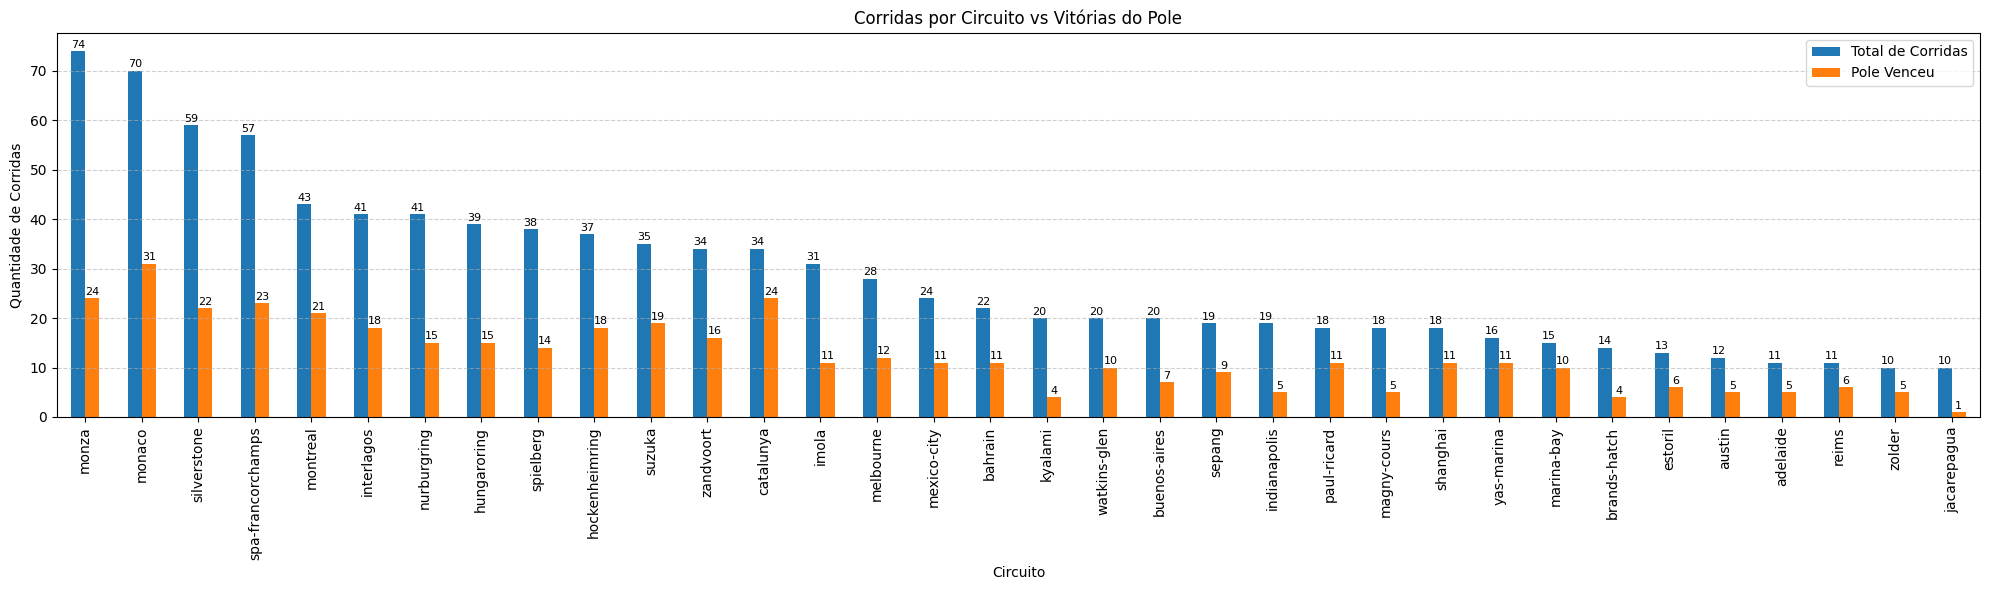

In [ ]:
# Total de corridas por circuito
total_por_circuito = df_pole_ganhou_por_circuito.groupby('circuitId').size()

# Corridas em que o pole venceu por circuito
pole_ganhou_por_circuito = df_pole_ganhou_por_circuito[df_pole_ganhou_por_circuito['pole_ganhou']].groupby('circuitId').size()

# Garantir que ambas as séries tenham os mesmos circuitos
result = pd.DataFrame({
    'total_corridas': total_por_circuito,
    'pole_venceu': pole_ganhou_por_circuito
}).fillna(0)

# Converter pole_venceu para inteiro
result['pole_venceu'] = result['pole_venceu'].astype(int)

# Ordena por total de corridas para melhor visualização
result = result.sort_values(by='total_corridas', ascending=False)

result = result[result['total_corridas'] >= 10]

# Plotando
ax = result.plot(kind='bar', figsize=(20, 6))
plt.title('Corridas por Circuito vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Circuito')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 0.3,
                int(altura),
                ha='center', va='bottom', fontsize=8)

plt.show()


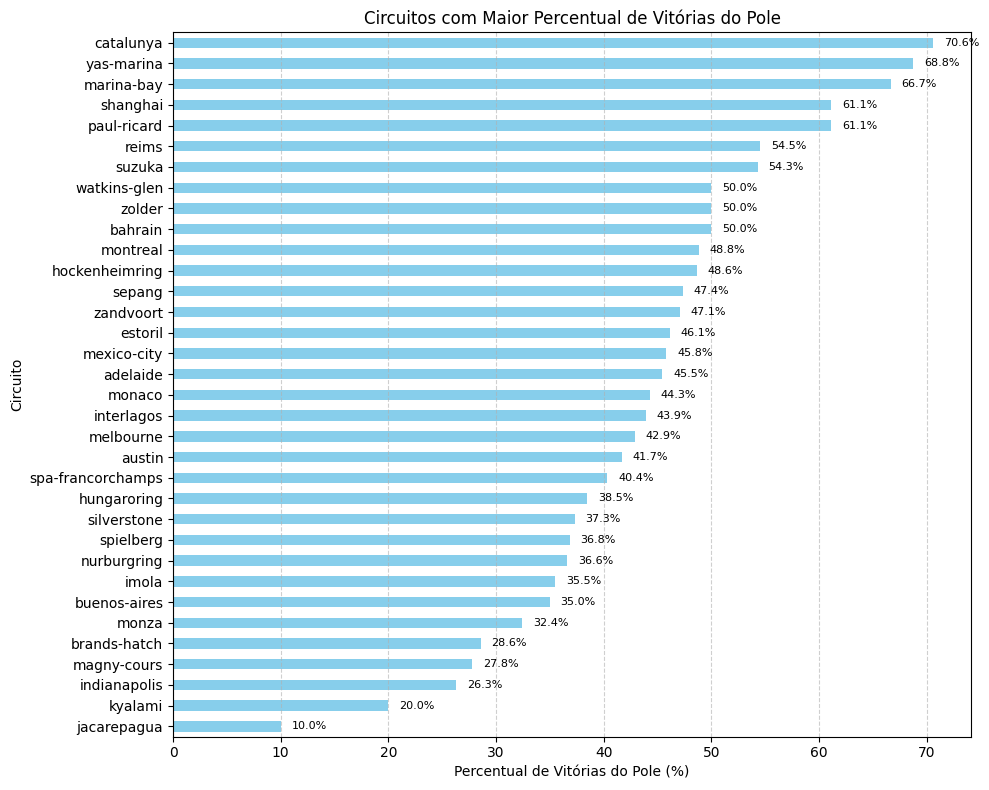

In [ ]:
result['percentual_pole_venceu_por_total_corrida'] = round((result['pole_venceu'] / result['total_corridas'] * 100), 2)

# Ordenar pelos maiores percentuais
result_percentual = result.sort_values(by='percentual_pole_venceu_por_total_corrida', ascending=False)

# Filtrar para circuitos com pelo menos 10 corridas (ou outro critério relevante)
result_percentual = result_percentual[result_percentual['total_corridas'] >= 10]

# Plotar
ax = result_percentual['percentual_pole_venceu_por_total_corrida'].plot(
    kind='barh',
    figsize=(10, 8),
    color='skyblue'
)

plt.xlabel('Percentual de Vitórias do Pole (%)')
plt.ylabel('Circuito')
plt.title('Circuitos com Maior Percentual de Vitórias do Pole')
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adiciona rótulos com os percentuais
for i, (circuito, row) in enumerate(result_percentual.iterrows()):
    ax.text(row['percentual_pole_venceu_por_total_corrida'] + 1, i, f"{row['percentual_pole_venceu_por_total_corrida']:.1f}%", va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [36]:
df_merge.head()
df_merge[df_merge[''] ==]

,raceId,year,round,date,time,grandPrixId,officialName,qualifyingFormat,sprintQualifyingFormat,circuitId,circuitType,direction,courseLength,turns,laps,distance,scheduledLaps,scheduledDistance,driversChampionshipDecider,constructorsChampionshipDecider,preQualifyingDate,preQualifyingTime,freePractice1Date,freePractice1Time,freePractice2Date,freePractice2Time,freePractice3Date,freePractice3Time,freePractice4Date,freePractice4Time,qualifying1Date,qualifying1Time,qualifying2Date,qualifying2Time,qualifyingDate,qualifyingTime,sprintQualifyingDate,sprintQualifyingTime,sprintRaceDate,sprintRaceTime,warmingUpDate,warmingUpTime,races_race_results_year,races_race_results_round,races_race_results_positionDisplayOrder,races_race_results_positionNumber,races_race_results_positionText,races_race_results_driverNumber,driverId,constructorId,engineManufacturerId,tyreManufacturerId,races_race_results_sharedCar,races_race_results_laps,races_race_results_time,races_race_results_timeMillis,races_race_results_timePenalty,races_race_results_timePenaltyMillis,races_race_results_gap,races_race_results_gapMillis,races_race_results_gapLaps,races_race_results_interval,races_race_results_intervalMillis,races_race_results_reasonRetired,races_race_results_points,races_race_results_polePosition,races_race_results_qualificationPositionNumber,races_race_results_qualificationPositionText,races_race_results_gridPositionNumber,races_race_results_gridPositionText,races_race_results_positionsGained,races_race_results_pitStops,races_race_results_fastestLap,races_race_results_driverOfTheDay,races_race_results_grandSlam,races_constructor_standings_year,races_constructor_standings_round,races_constructor_standings_positionDisplayOrder,races_constructor_standings_positionNumber,races_constructor_standings_positionText,races_constructor_standings_points,races_constructor_standings_positionsGained,races_driver_standings_year,races_driver_standings_round,races_driver_standings_positionDisplayOrder,races_driver_standings_positionNumber,races_driver_standings_positionText,races_driver_standings_points,races_driver_standings_positionsGained,races_starting_grid_positions_year,races_starting_grid_positions_round,races_starting_grid_positions_positionDisplayOrder,races_starting_grid_positions_positionNumber,races_starting_grid_positions_positionText,races_starting_grid_positions_driverNumber,races_starting_grid_positions_qualificationPositionNumber,races_starting_grid_positions_qualificationPositionText,races_starting_grid_positions_gridPenalty,races_starting_grid_positions_gridPenaltyPositions,races_starting_grid_positions_time,races_starting_grid_positions_timeMillis,circuits_name,circuits_fullName,circuits_previousNames,circuits_type,circuits_direction,circuits_placeName,countryId_x,circuits_latitude,circuits_longitude,circuits_length,circuits_turns,circuits_totalRacesHeld,constructors_name,constructors_fullName,countryId_y,constructors_bestChampionshipPosition,constructors_bestStartingGridPosition,constructors_bestRaceResult,constructors_totalChampionshipWins,constructors_totalRaceEntries,constructors_totalRaceStarts,constructors_totalRaceWins,constructors_total1And2Finishes,constructors_totalRaceLaps,constructors_totalPodiums,constructors_totalPodiumRaces,constructors_totalPoints,constructors_totalChampionshipPoints,constructors_totalPolePositions,constructors_totalFastestLaps,drivers_name,drivers_firstName,drivers_lastName,drivers_fullName,drivers_abbreviation,drivers_permanentNumber,drivers_gender,drivers_dateOfBirth,drivers_dateOfDeath,drivers_placeOfBirth,countryOfBirthCountryId,nationalityCountryId,secondNationalityCountryId,drivers_bestChampionshipPosition,drivers_bestStartingGridPosition,drivers_bestRaceResult,drivers_totalChampionshipWins,drivers_totalRaceEntries,drivers_totalRaceStarts,drivers_totalRaceWins,drivers_totalRaceLaps,drivers_totalPodiums,drivers_totalPoints,drivers_totalChampionshipPoints,drivers_totalPolePositions,drivers_totalFastestLaps,drivers_totalDri

In [39]:
# Separar colunas numéricas e categóricas
numeric_cols = df_merge.select_dtypes(include=['number']).columns
categorical_cols = df_merge.select_dtypes(include=['object', 'category']).columns
datetime_cols = df_merge.select_dtypes(include=['datetime64[ns]']).columns

# Estatísticas descritivas para variáveis numéricas
numeric_summary = df_merge[numeric_cols].describe().T

# Contagem de valores únicos para categóricas
categorical_uniques = df_merge[categorical_cols].nunique().sort_values(ascending=False)

# Valores ausentes
missing_values = df_merge.isnull().sum().sort_values(ascending=False)

numeric_summary, categorical_uniques, missing_values

(                                           count          mean           std   
 raceId                                   26931.0    542.487022    315.282919  \
 year                                     26931.0   1991.525565     20.026052   
 round                                    26931.0      8.499759      5.069845   
 courseLength                             26931.0      5.477442      3.026994   
 turns                                    26931.0     18.093313     21.681501   
 ...                                          ...           ...           ...   
 races_qualifying_results_q2Millis         5814.0  87757.463364  12124.123999   
 races_qualifying_results_q3Millis         3679.0  87412.544170  12202.052072   
 races_qualifying_results_gapMillis       20786.0   4469.969980  13667.702789   
 races_qualifying_results_intervalMillis  20776.0    710.898104  10055.422982   
 races_qualifying_results_laps            12416.0     13.680976      6.099282   
 
                          

In [69]:
# Calcular total e percentual de valores ausentes
missing_df = df_merge.isnull().sum().to_frame(name='missing_count')
missing_df['missing_percent'] = (missing_df['missing_count'] / len(df_merge)) * 100

# Filtrar apenas colunas com valores ausentes e ordenar
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_count', ascending=False)

# Exibir as 100 principais
missing_df.head(100)


,missing_count,missing_percent
warmingUpDate,26931,100.000000
warmingUpTime,26931,100.000000
qualifying2Time,26931,100.000000
qualifying2Date,26931,100.000000
qualifying1Time,26931,100.000000
...,...,...
seasons_drivers_bestRaceResult,1281,4.756600
engine_manufacturers_bestChampionshipPosition,1039,3.858008
races_race_results_qualificationPositionNumber,730,2.710631
races_qualifying_results_positionNumber,648,2.406149


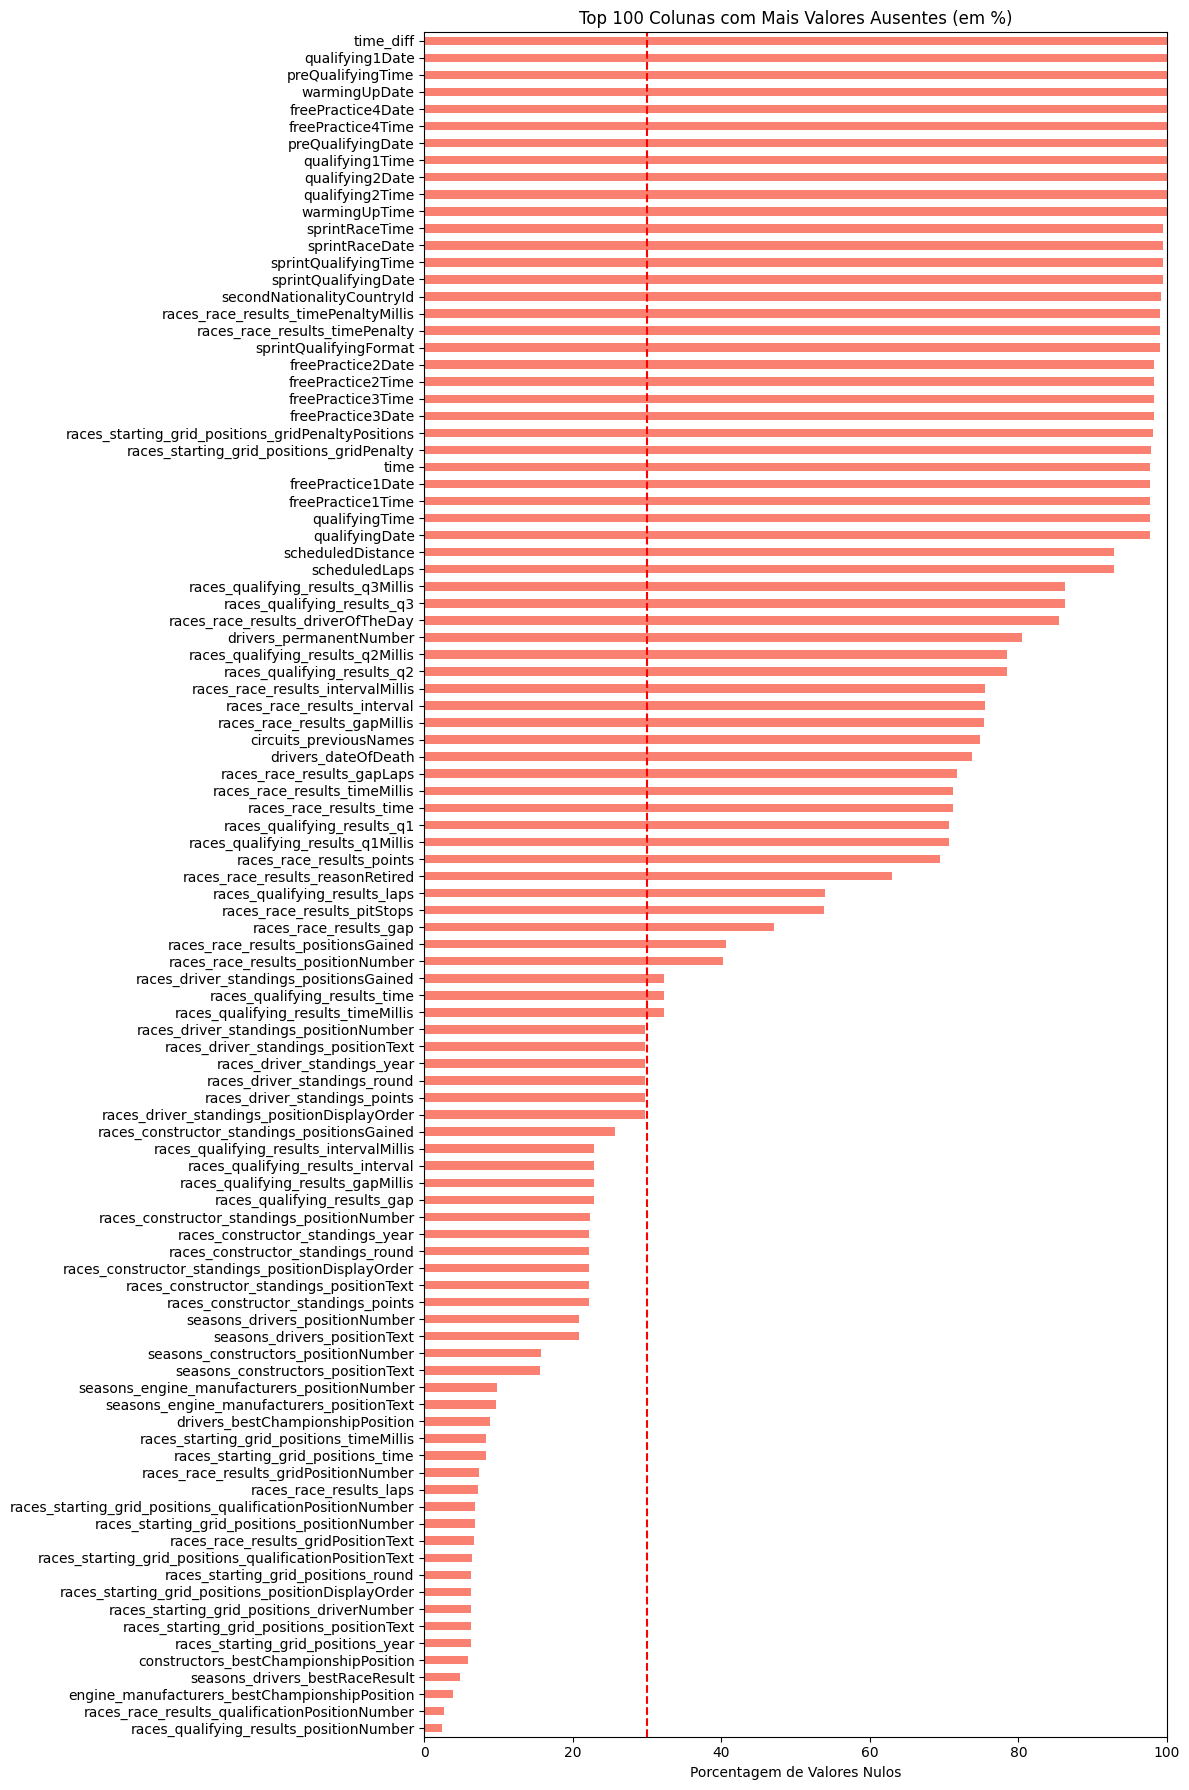

In [96]:
import matplotlib.pyplot as plt

# Calcular total e percentual de valores ausentes
missing_df = df_merge.isnull().sum().to_frame(name='missing_count')
missing_df['missing_percent'] = (missing_df['missing_count'] / len(df_merge)) * 100

# Filtrar as 100 colunas com maior percentual de nulos
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percent', ascending=False).head(100)

# Plotar gráfico
plt.figure(figsize=(12, 18))
missing_df['missing_percent'].sort_values().plot(kind='barh', color='salmon')
plt.title('Top 100 Colunas com Mais Valores Ausentes (em %)')
plt.xlabel('Porcentagem de Valores Nulos')
plt.axvline(x=30, color='red', linestyle='--', label='Corte de 30%')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


missing_count      154
missing_percent    154
dtype: int64


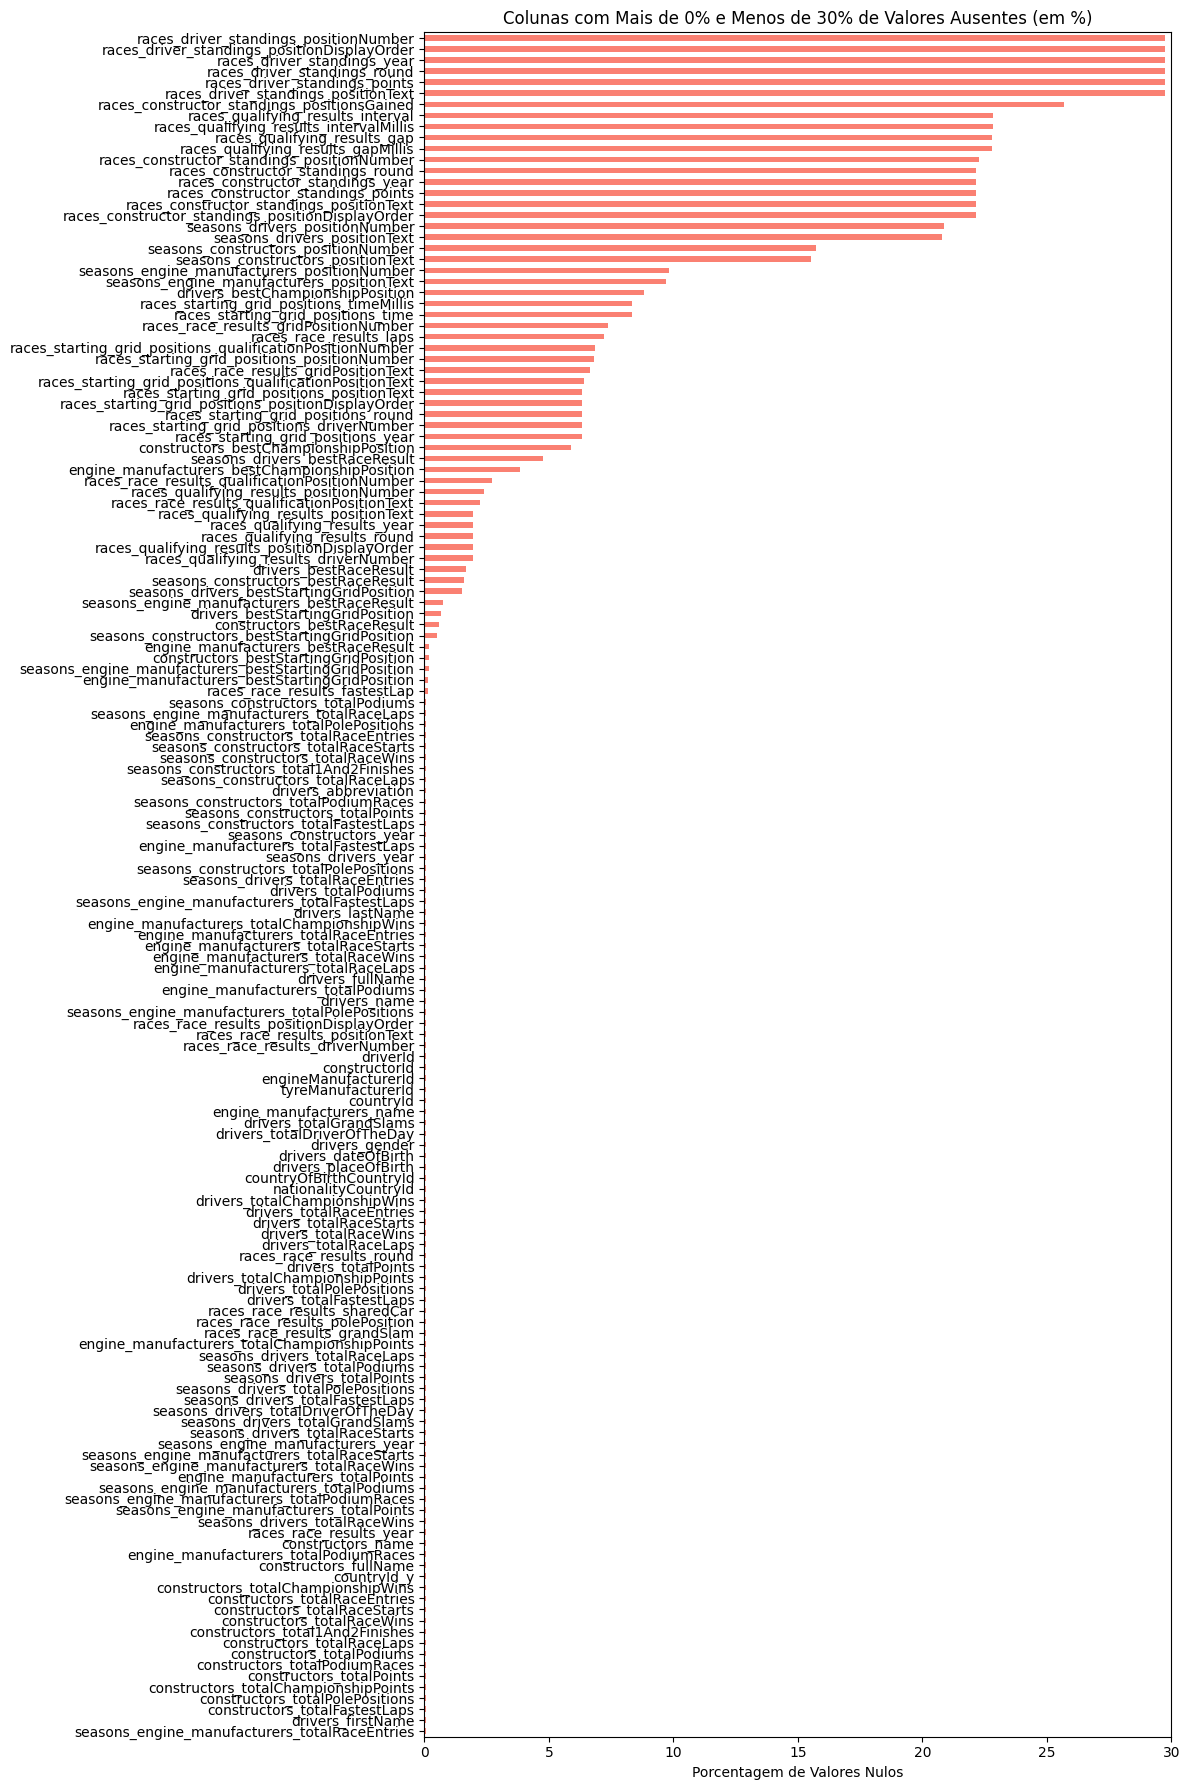

In [82]:
import matplotlib.pyplot as plt

# Calcular total e percentual de valores ausentes
missing_df = df_merge.isnull().sum().to_frame(name='missing_count')
missing_df['missing_percent'] = (missing_df['missing_count'] / len(df_merge)) * 100

# Filtrar as colunas com mais de 0% e menos de 30% de valores nulos
missing_df_filtered = missing_df[(missing_df['missing_percent'] > 0) & (missing_df['missing_percent'] < 30)]
print(missing_df_filtered.count())
missing_df = missing_df_filtered.sort_values(by='missing_percent', ascending=False)

# Plotar gráfico
plt.figure(figsize=(12, 18))
missing_df['missing_percent'].sort_values().plot(kind='barh', color='salmon')
plt.title('Colunas com Mais de 0% e Menos de 30% de Valores Ausentes (em %)') 
plt.xlabel('Porcentagem de Valores Nulos')
plt.xlim(0, 30)
plt.tight_layout()
plt.show()


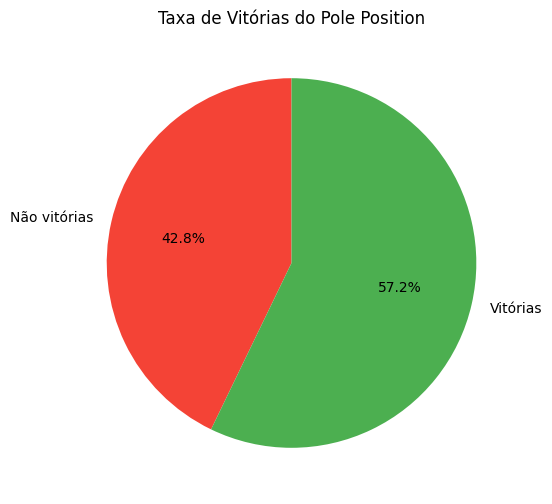

In [105]:
pole_df = df_merge[df_merge['races_race_results_polePosition'] == True]
pole_wins = (pole_df['races_race_results_positionNumber'] == 1).sum()
pole_total = len(pole_df)

plt.figure(figsize=(6, 6))
plt.pie([pole_wins, pole_total - pole_wins],
        labels=['Não vitórias', 'Vitórias'],
        autopct='%1.1f%%',
        colors=['#F44336','#4CAF50'],
        startangle=90)
plt.title('Taxa de Vitórias do Pole Position')
plt.show()


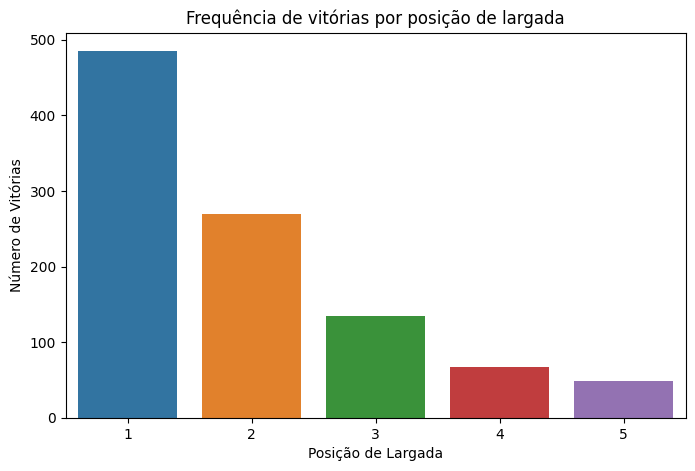

In [44]:
top_grid = df_merge[df_merge['races_race_results_positionNumber'] == 1]
plt.figure(figsize=(8, 5))
sns.countplot(
    data=top_grid,
    x='races_race_results_gridPositionNumber',
    order=sorted(top_grid['races_race_results_gridPositionNumber'].dropna().astype(int).value_counts().iloc[:5].index)
)
plt.title('Frequência de vitórias por posição de largada')
plt.xlabel('Posição de Largada')
plt.ylabel('Número de Vitórias')
plt.show()


In [110]:
pole_df = df_merge[df_merge['races_race_results_polePosition'] == True]

plt.figure(figsize=(10, 5))
sns.histplot(pole_df['races_race_results_gapMillis'].dropna(), bins=50000, kde=True)
plt.title('Distribuição da diferença de tempo do Pole Position (ms)')
plt.xlabel('Diferença de tempo para o vencedor (em ms)')
plt.ylabel('Frequência')
plt.show()


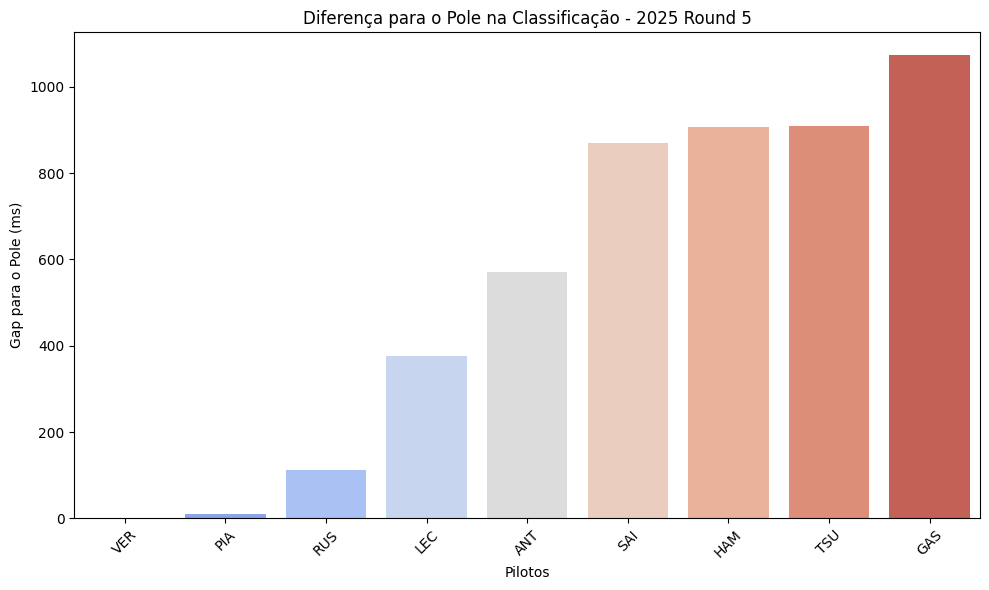

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas os pilotos que participaram da Q3 (opcional)
qualifying = df_merge.dropna(subset=['races_qualifying_results_q3Millis'])

# Seleciona a última corrida ou uma corrida específica (exemplo: última)
latest_race = qualifying.sort_values(['races_qualifying_results_year', 'races_qualifying_results_round'], ascending=[False, False]).iloc[0]
race_filter = (
    (qualifying['races_qualifying_results_year'] == latest_race['races_qualifying_results_year']) &
    (qualifying['races_qualifying_results_round'] == latest_race['races_qualifying_results_round'])
)

# race_qualifying = qualifying[
#     (qualifying['races_qualifying_results_year'] == 2022) &
#     (qualifying['races_qualifying_results_round'] == 21)  # Interlagos 2022
# ]

# Ordena os tempos para saber quem foi o pole
race_qualifying = race_qualifying.sort_values(by='races_qualifying_results_q3Millis')
pole_time = race_qualifying.iloc[0]['races_qualifying_results_q3Millis']

# Calcula diferença para o pole
race_qualifying['gap_to_pole_ms'] = race_qualifying['races_qualifying_results_q3Millis'] - pole_time

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_qualifying,
    x='drivers_abbreviation',
    y='gap_to_pole_ms',
    palette='coolwarm'
)
plt.title(f'Diferença para o Pole na Classificação - {latest_race["year"]} Round {latest_race["round"]}')
plt.ylabel('Gap para o Pole (ms)')
plt.xlabel('Pilotos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vtmac\AppData\Local\Temp\ipykernel_29980\1738563414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['grid_pos'] = df_valid['races_race_results_gridPositionNumber'].astype(int)
C:\Users\vtmac\AppData\Local\Temp\ipykernel_29980\1738563414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['final_pos'] = df_valid['races_race_results_positionNumber'].astype(int)


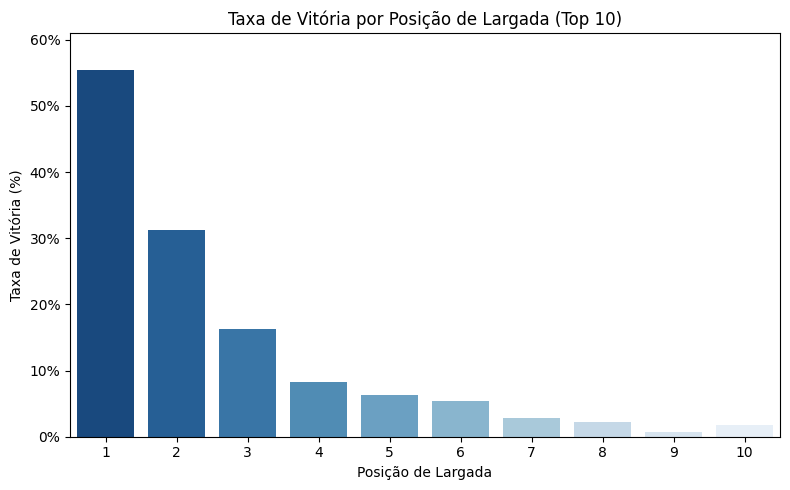

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Filtra apenas os dados com posições válidas
df_valid = df_merge[
    df_merge['races_race_results_gridPositionNumber'].notna() &
    df_merge['races_race_results_positionNumber'].notna()
]

# Converte para inteiros
df_valid['grid_pos'] = df_valid['races_race_results_gridPositionNumber'].astype(int)
df_valid['final_pos'] = df_valid['races_race_results_positionNumber'].astype(int)

# Total de largadas por posição
total_largadas = df_valid['grid_pos'].value_counts().sort_index()

# Total de vitórias por posição de largada
vitorias = df_valid[df_valid['final_pos'] == 1]['grid_pos'].value_counts().sort_index()

# Calcula taxa de vitória
taxa_vitoria = (vitorias / total_largadas).fillna(0)

# Filtra apenas o top 10
taxa_vitoria_top10 = taxa_vitoria.loc[1:10]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=taxa_vitoria_top10.index, y=taxa_vitoria_top10.values, palette='Blues_r')
plt.title('Taxa de Vitória por Posição de Largada (Top 10)')
plt.xlabel('Posição de Largada')
plt.ylabel('Taxa de Vitória (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylim(0, taxa_vitoria_top10.max() * 1.1)
plt.tight_layout()
plt.show()
